In [1]:
# 9-24-2025

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [2]:
fires = pd.read_csv("fires_with_ndvi.csv")

In [3]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589,1970-01-01 00:00:00.002453540,5016.0
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979,1970-01-01 00:00:00.002453411,3357.0
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654,1970-01-01 00:00:00.002453544,4356.0
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589,1970-01-01 00:00:00.002453559,3124.0
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207,1970-01-01 00:00:00.002453582,4180.0


In [4]:
fires.shape

(2926, 14)

In [5]:
fires = fires.sample(frac=1, random_state = 5)

In [53]:
fires.describe(include="all")
# yrs range from 2005 to 2015

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi
count,2.925000e+03,2925.000000,2.925000e+03,2925.000000,2925,2925.000000,2925.000000,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925,2925.000000
unique,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN
top,NaN,NaN,NaN,NaN,Miscellaneous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.002454395,NaN
freq,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN
mean,1.119450e+06,2009.355214,2.455156e+06,698.691350,NaN,33.847033,-117.369049,1.119450e+06,83.950462,68.572991,0.003940,8.033466,NaN,3166.863248
std,6.233933e+05,3.011034,1.093666e+03,8032.273574,NaN,0.616471,0.965727,6.233933e+05,11.233505,19.489743,0.020737,2.531750,NaN,1137.025054
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,NaN,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,NaN,-3000.000000
25%,3.691760e+05,2007.000000,2.454122e+06,3.000000,NaN,33.521111,-117.775556,3.691760e+05,76.820000,54.000000,0.000000,6.401492,NaN,2331.000000
50%,1.181299e+06,2009.000000,2.455132e+06,6.300000,NaN,33.896111,-117.182300,1.181299e+06,85.100000,71.000000,0.000000,7.520199,NaN,3020.000000
75%,1.626258e+06,2012.000000,2.456066e+06,32.000000,NaN,34.311111,-116.862001,1.626258e+06,91.940000,85.000000,0.000000,9.011809,NaN,3923.000000


<Axes: xlabel='FIRE_YEAR', ylabel='Count'>

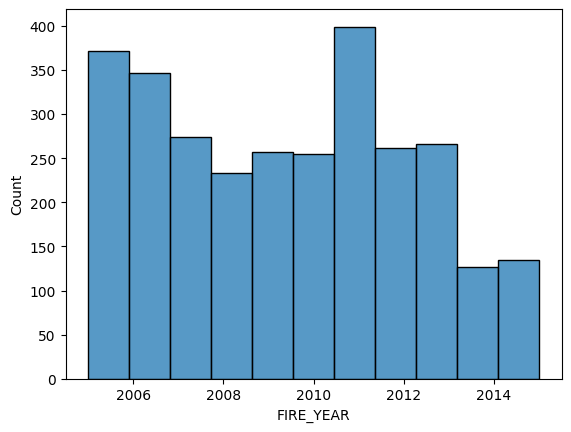

In [57]:
sns.histplot(data=fires, x="FIRE_YEAR", bins=11, kde=False)

<Axes: xlabel='temp_max_F', ylabel='Count'>

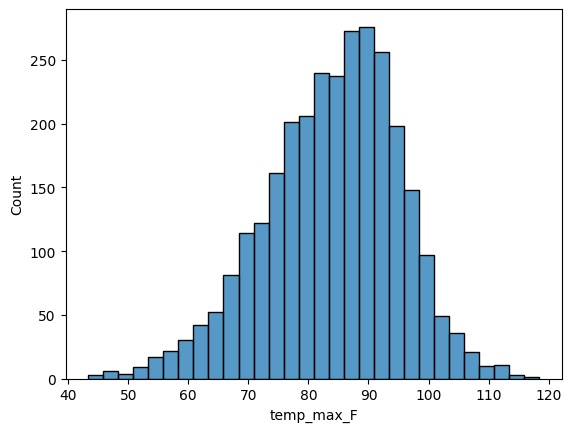

In [6]:
sns.histplot(data=fires, x="temp_max_F", bins=30, kde=False)


<Axes: xlabel='ndvi', ylabel='Count'>

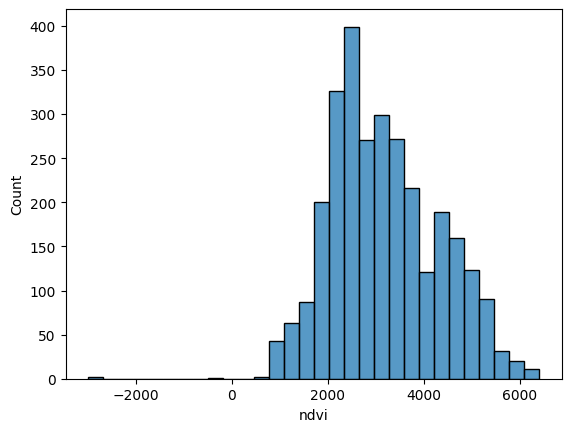

In [7]:
sns.histplot(data=fires, x="ndvi", bins=30, kde=False)


In [8]:
fires.corr(numeric_only=True)

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
OBJECTID,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413
FIRE_YEAR,0.724785,1.000000,0.998150,-0.034775,0.012318,-0.073362,0.724785,-0.077494,0.026150,-0.013048,0.052482,0.022508
DISCOVERY_DATE,0.723057,0.998150,1.000000,-0.031879,0.012152,-0.078066,0.723057,-0.066895,0.023370,-0.012887,0.045028,0.029100
FIRE_SIZE,-0.096118,-0.034775,-0.031879,1.000000,0.028925,-0.057219,-0.096118,0.004367,-0.038592,-0.008663,0.023431,0.079080
LATITUDE,-0.098185,0.012318,0.012152,0.028925,1.000000,-0.679641,-0.098185,0.005343,-0.178536,-0.004261,-0.062924,-0.031825
LONGITUDE,0.044267,-0.073362,-0.078066,-0.057219,-0.679641,1.000000,0.044267,0.235064,-0.141372,0.013715,0.034864,-0.228041
OBJECTID.1,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413
temp_max_F,-0.076047,-0.077494,-0.066895,0.004367,0.005343,0.235064,-0.076047,1.000000,-0.453242,-0.066382,-0.107019,-0.143312
humidity_pct,0.089247,0.026150,0.023370,-0.038592,-0.178536,-0.141372,0.089247,-0.453242,1.000000,0.089772,-0.032953,0.104203
precip_in,-0.002504,-0.013048,-0.012887,-0.008663,-0.004261,0.013715,-0.002504,-0.066382,0.089772,1.000000,-0.045733,0.022210


In [9]:
fires.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
count,2.926000e+03,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2925.000000
mean,1.119678e+06,2009.356801,2.455157e+06,698.459740,33.847226,-117.369907,1.119678e+06,83.949132,68.571770,0.003938,8.036604,3166.863248
std,6.234096e+05,3.011743,1.093919e+03,8030.910191,0.616454,0.966675,6.234096e+05,11.231815,19.486523,0.020734,2.537002,1137.025054
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,-3000.000000
25%,3.691762e+05,2007.000000,2.454122e+06,3.000000,33.521111,-117.776414,3.691762e+05,76.820000,54.000000,0.000000,6.401492,2331.000000
50%,1.181302e+06,2009.000000,2.455136e+06,6.300000,33.896111,-117.182678,1.181302e+06,85.100000,71.000000,0.000000,7.551274,3020.000000
75%,1.626262e+06,2012.000000,2.456067e+06,32.000000,34.311111,-116.862188,1.626262e+06,91.940000,85.000000,0.000000,9.058421,3923.000000
max,1.880442e+06,2015.000000,2.457382e+06,240207.000000,35.000000,-114.203000,1.880442e+06,118.400000,100.000000,0.551181,28.589186,6407.000000


In [10]:
rows_with_missing = fires[fires.isnull().any(axis=1)]
rows_with_missing


,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi
2574,1788879,2014,2456834.5,21.0,Missing/Undefined,34.411058,-119.877385,1788879,80.06,65,0.0,17.215662,1970-01-01 00:00:00.002456834,NaN


In [11]:
fires = fires.dropna()

In [12]:
fires.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
count,2.925000e+03,2925.000000,2.925000e+03,2925.000000,2925.000000,2925.000000,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,1.119450e+06,2009.355214,2.455156e+06,698.691350,33.847033,-117.369049,1.119450e+06,83.950462,68.572991,0.003940,8.033466,3166.863248
std,6.233933e+05,3.011034,1.093666e+03,8032.273574,0.616471,0.965727,6.233933e+05,11.233505,19.489743,0.020737,2.531750,1137.025054
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,-3000.000000
25%,3.691760e+05,2007.000000,2.454122e+06,3.000000,33.521111,-117.775556,3.691760e+05,76.820000,54.000000,0.000000,6.401492,2331.000000
50%,1.181299e+06,2009.000000,2.455132e+06,6.300000,33.896111,-117.182300,1.181299e+06,85.100000,71.000000,0.000000,7.520199,3020.000000
75%,1.626258e+06,2012.000000,2.456066e+06,32.000000,34.311111,-116.862001,1.626258e+06,91.940000,85.000000,0.000000,9.011809,3923.000000
max,1.880442e+06,2015.000000,2.457382e+06,240207.000000,35.000000,-114.203000,1.880442e+06,118.400000,100.000000,0.551181,28.589186,6407.000000


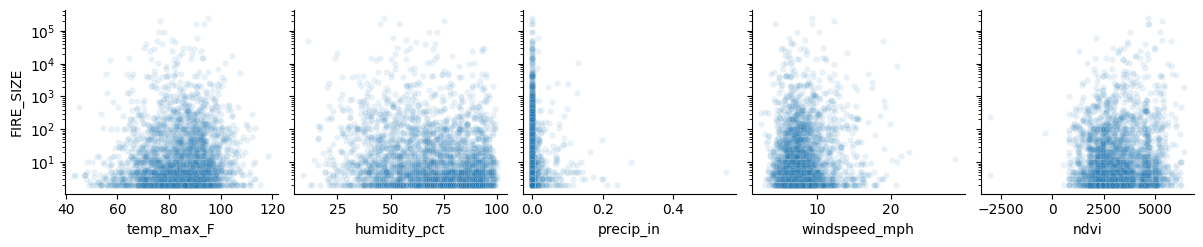

In [13]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# semi log shows streaks in data

In [14]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi"]].copy()
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
2797,2.0,95.54,69,0.0,13.486638,1730.0
1790,3.3,93.20,67,0.0,7.271597,2349.0
186,340.0,82.76,72,0.0,8.949658,4448.0
2504,21.6,75.74,69,0.0,6.712244,2227.0
976,8.0,78.80,16,0.0,15.972654,4496.0
...,...,...,...,...,...,...
2121,47.0,80.78,84,0.0,8.328154,3307.0
1424,7.0,79.88,93,0.0,12.865134,4649.0
1725,78.8,102.74,50,0.0,7.147296,832.0
2254,110.0,93.92,60,0.0,7.022996,4583.0


In [15]:
fires_data.corr()

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
FIRE_SIZE,1.000000,0.004357,-0.038598,-0.008668,0.023588,0.079080
temp_max_F,0.004357,1.000000,-0.453276,-0.066406,-0.106832,-0.143312
humidity_pct,-0.038598,-0.453276,1.000000,0.089762,-0.032800,0.104203
precip_in,-0.008668,-0.066406,0.089762,1.000000,-0.045601,0.022210
windspeed_mph,0.023588,-0.106832,-0.032800,-0.045601,1.000000,-0.132715
ndvi,0.079080,-0.143312,0.104203,0.022210,-0.132715,1.000000


In [16]:
fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

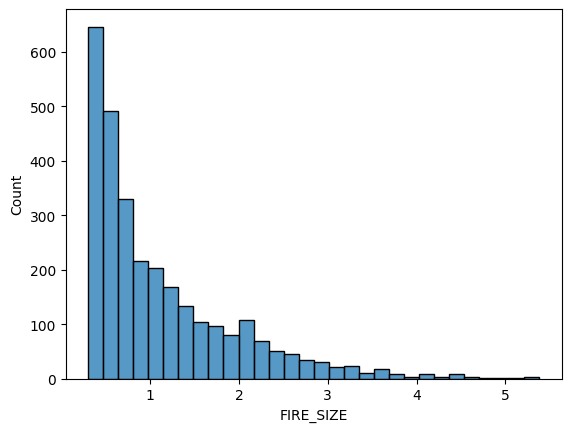

In [17]:
sns.histplot(data=fires_data, x="FIRE_SIZE", bins=30, kde=False)
plt.show()

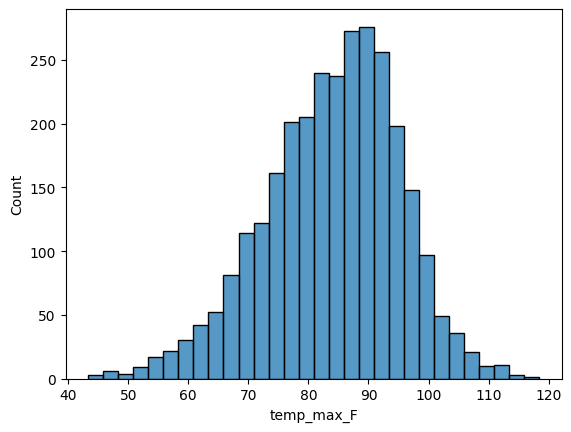

In [18]:
sns.histplot(data=fires_data, x="temp_max_F", bins=30, kde=False)
plt.show()

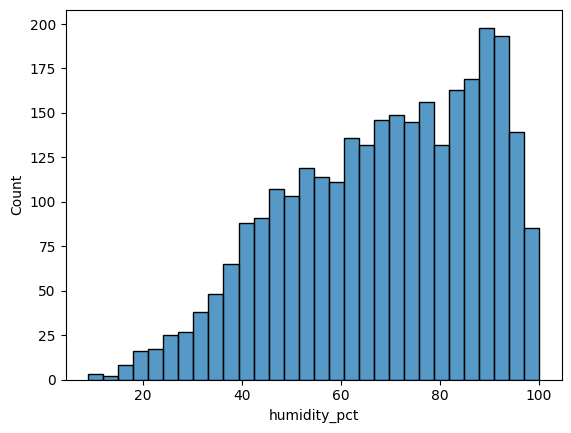

In [19]:
sns.histplot(data=fires_data, x="humidity_pct", bins=30, kde=False)
plt.show()

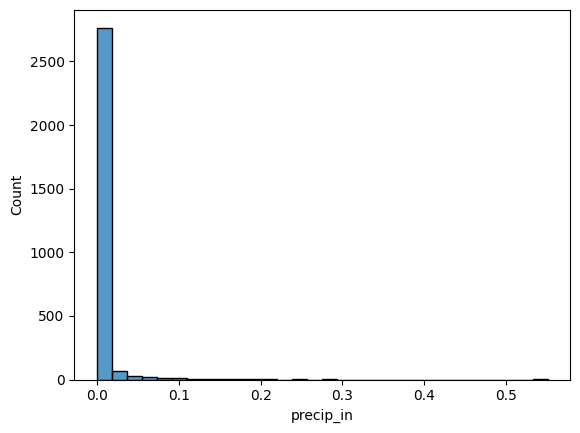

In [20]:
sns.histplot(data=fires_data, x="precip_in", bins=30, kde=False)
plt.show()

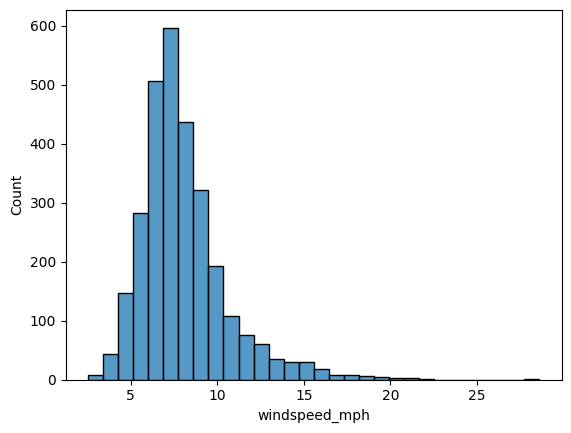

In [21]:
sns.histplot(data=fires_data, x="windspeed_mph", bins=30, kde=False)
plt.show()

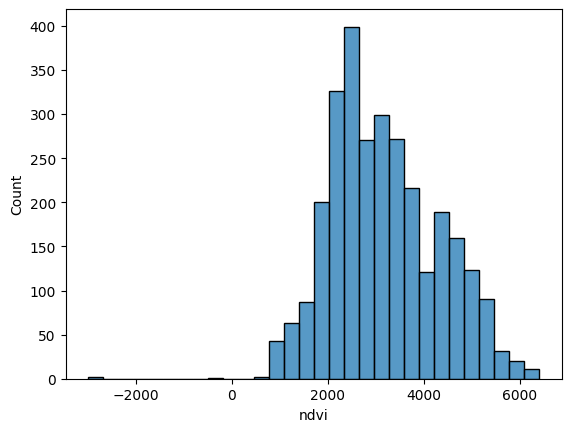

In [22]:
sns.histplot(data=fires_data, x="ndvi", bins=30, kde=False)
plt.show()
# ndvi is normaldist

In [23]:
iqr_cols = ["windspeed_mph"] # not including precip bc it has such a long and small tail, everything's just gonna get clipped
zscore_cols = ["temp_max_F", "humidity_pct"]

In [24]:
for col in iqr_cols:
    Q1 = fires_data[col].quantile(0.25)
    Q3 = fires_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.9 * IQR
    upper = Q3 + 1.9 * IQR
    fires_data[col] = fires_data[col].clip(lower, upper)

In [25]:
k = 3 # 3 std from mean (99.7%)
for col in zscore_cols:
    mean = fires_data[col].mean()
    std = fires_data[col].std()
    lower = mean - k * std
    upper = mean + k * std
    fires_data[col] = fires_data[col].clip(lower, upper)

In [26]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
2797,0.301030,95.54,69.0,0.0,13.486638,1730.0
1790,0.518514,93.20,67.0,0.0,7.271597,2349.0
186,2.531479,82.76,72.0,0.0,8.949658,4448.0
2504,1.334454,75.74,69.0,0.0,6.712244,2227.0
976,0.903090,78.80,16.0,0.0,13.971411,4496.0
...,...,...,...,...,...,...
2121,1.672098,80.78,84.0,0.0,8.328154,3307.0
1424,0.845098,79.88,93.0,0.0,12.865134,4649.0
1725,1.896526,102.74,50.0,0.0,7.147296,832.0
2254,2.041393,93.92,60.0,0.0,7.022996,4583.0


In [27]:
X = fires_data.drop("FIRE_SIZE", axis=1)
y = fires_data["FIRE_SIZE"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [29]:
power_cols = ["precip_in", "windspeed_mph"]
standard_cols = ["temp_max_F", "humidity_pct", "ndvi"]

In [30]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [31]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])


X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

In [32]:
X_train

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
1191,-2.284273,0.685029,-0.310953,-1.164227,-0.594696
1990,-1.181446,-0.754275,-0.310953,0.044621,0.445292
2513,0.456577,-1.114101,-0.310953,0.632677,-0.982280
567,-1.116574,1.199066,-0.310953,0.657105,-0.249203
2338,-0.273235,1.250470,-0.310953,0.324678,0.577702
...,...,...,...,...,...
2579,-1.278754,-0.600064,-0.310953,0.482217,-0.334261
1381,-0.451633,0.736433,-0.310953,-0.166033,0.134874
2639,-1.489589,1.301873,1.333992,0.351452,0.992470
596,1.024209,-0.445853,-0.310953,-2.313137,-1.073477


In [33]:
y_train

1191    0.301030
1990    0.778151
2513    1.041393
567     0.477121
2338    0.556303
          ...   
2579    2.800717
1381    1.447158
2639    0.903090
596     0.903090
2672    2.324282
Name: FIRE_SIZE, Length: 2340, dtype: float64

In [34]:
model = Sequential([
    Dense(64, activation="relu"),
    
    Dense(128, activation="relu"),
    Dropout(0.2),
    
    Dense(128, activation="relu"),
    Dropout(0.3),
    
    Dense(32, activation="relu"),
    
    Dense(32, activation="relu"),
    
    Dense(1)
])

In [35]:
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

In [36]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6972 - mae: 0.6972 - val_loss: 0.6102 - val_mae: 0.6102
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6381 - mae: 0.6381 - val_loss: 0.6058 - val_mae: 0.6058
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5992 - mae: 0.5992 - val_loss: 0.6013 - val_mae: 0.6013
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6329 - mae: 0.6329 - val_loss: 0.6072 - val_mae: 0.6072
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6142 - mae: 0.6142 - val_loss: 0.6044 - val_mae: 0.6044
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6152 - mae: 0.6152 - val_loss: 0.6033 - val_mae: 0.6033
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5968 - mae: 0.5968 - val_loss: 0.6050 - val_mae: 0.6050
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6055 - mae: 0.6055 - val_loss: 0.5982 - val_mae: 0.5982
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6204 - mae: 

In [37]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6653 - mae: 0.6653 
Test loss mae: 0.6535466909408569


In [38]:
loss # gives mae and mse

[0.6535466909408569, 0.6535466909408569]

In [39]:
y_pred = model.predict(X_test)
y_pred

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.0262159 ],
       [0.6909791 ],
       [0.50590074],
       [0.98136723],
       [0.9568893 ],
       [1.0019431 ],
       [0.58363634],
       [0.65682864],
       [0.85618544],
       [0.670046  ],
       [0.68610907],
       [0.6251664 ],
       [0.57360375],
       [0.749331  ],
       [0.79733884],
       [0.6554481 ],
       [0.369567  ],
       [0.72151124],
       [0.8192072 ],
       [0.5293895 ],
       [0.6331382 ],
       [0.81425846],
       [0.45109493],
       [0.80513453],
       [0.5816882 ],
       [1.0742304 ],
       [0.7921283 ],
       [0.6343709 ],
       [0.9293132 ],
       [0.9670603 ],
       [0.6273296 ],
       [0.6923125 ],
       [0.6327212 ],
       [0.73347664],
       [0.6559237 ],
       [0.69762003],
       [0.71144557],
       [0.815845  ],
       [0.56461644],
       [0.7504138 ],
       [0.9275881 ],
       [1.221875  ],
       [0.7329993 ],
       [0.6171315 ],
       [1.1300352 ],
       [0.7211422 ],
       [0.69688165],
       [0.682

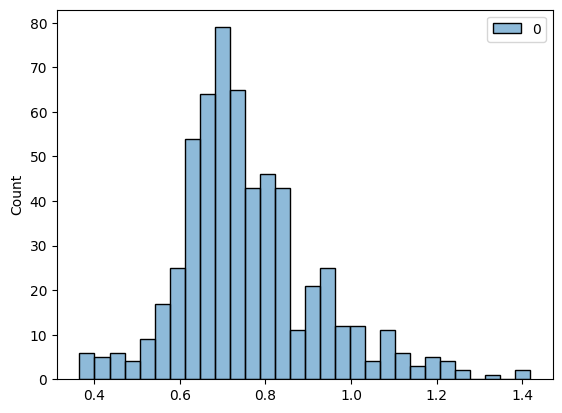

In [40]:
sns.histplot(data=y_pred, bins=30, kde=False)
plt.show()

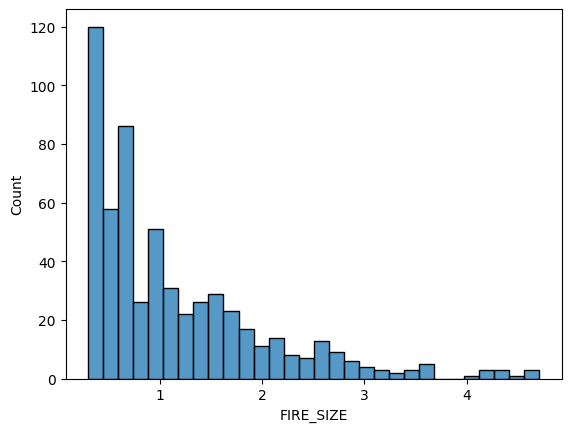

In [41]:
sns.histplot(data=y_test, bins=30, kde=False)
plt.show()

In [42]:
# changes: 
# added ndvi feature, used z-score scaling
#   had to drop a row from the dataset because the date of that fire was from 1970 and it had no ndvi value
# shuffled the dataset because it seemed that the fires were ordered by date
#   this actually caused the model to do slightly better
# added dropout to the biggest layers in the net
# changed activation to leakyrelu

# after seeing distribution of model predictions, the model is not predicting large fires, it predicted at most a fire of size 50 acres (10^1.7)

# NEED more useful/meaningful features.

In [43]:
import shap
# https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/?xgtab&


In [44]:
background = X_test.to_numpy()

In [45]:
X_test_sample = X_test.to_numpy()

In [46]:
feature_names = X_test.columns.tolist()


In [47]:
explainer = shap.DeepExplainer(model, background) # init explainer

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(585, 5))']
  warnings.warn(msg)


In [48]:
shap_values = explainer.shap_values(X_test_sample) # gives array of size (#rows,5,1)
shap_values = np.squeeze(shap_values, axis=2) # converts to (#rows,5)


c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1170, 5))']
  warnings.warn(msg)


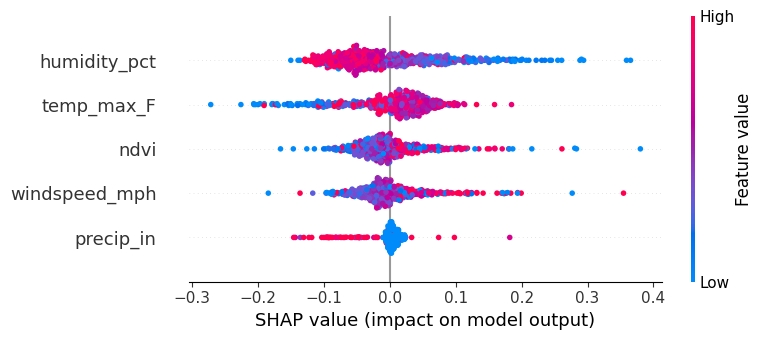

In [49]:
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names)
# features ranked higher on the y axis mean they influence model predictions more.
# each dot represents a feature for single example
# blue means the value for that feature was relatively low (ex temp of 65 degrees), red means relatively high value
# shap value is how the feature value influenced model output
#   negative shap value means it pushed prediction down
#   positive shap value means it pushed prediction up

In [50]:
X_test_sample.shape

(585, 5)

In [51]:
shap_values.shape

(585, 5)